In [ ]:
import sys

# New Section

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Please append your own directory after ‘/content/drive/My Drive/'
# where you have nutil.py and adult_subsample.csv
### ========== TODO : START ========== ###
sys.path += ['/content/drive/My Drive/cm146-2023-homeworks/PS1']
sys.path += ['/content/drive/']
sys.path += ['/content/drive/MyDrive']
### ========== TODO : END ========== ###


In [ ]:
from nutil import *

In [ ]:
# Use only the provided packages!
import math
import csv

from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [ ]:
######################################################################
# Immutatble classes
######################################################################

class Classifier(object) :
    """
    Classifier interface.
    """

    def fit(self, X, y):
        raise NotImplementedError()

    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that always predicts the majority class.

        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None

    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """
        majority_val = Counter(y).most_common(1)[0][0]
        self.prediction_ = majority_val
        return self

    def predict(self, X) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")

        n,d = X.shape
        y = [self.prediction_] * n
        return y



In [ ]:
######################################################################
# Mutatble classes
######################################################################

class RandomClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.

        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None

    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """

        ### ========== TODO : START ========== ###
        # part b: set self.probabilities_ according to the training set


        ratio= Counter(y)[0] / (Counter(y)[0]+Counter(y)[1])
        self.probabilities_ =ratio

        ### ========== TODO : END ========== ###

        return self

    def predict(self, X, seed=1234) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)

        ### ========== TODO : START ========== ###
        # part b: predict the class for each test example
        # hint: use np.random.choice (be careful of the parameters)
        n,d = X.shape

        y= np.random.choice(2,n,p=[self.probabilities_,1-self.probabilities_])

        ### ========== TODO : END ========== ###

        return y


In [ ]:
######################################################################
# Immutatble functions
######################################################################

def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,15))
    ncol = 3
    nrow = d // ncol + 1
    for i in range(d) :
        fig.add_subplot (nrow,ncol,i+1)
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')

    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.

    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """

    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    for target in targets :
        features = [X[i] for i in range(len(y)) if y[i] == target]
        data.append(features)
        labels.append('%s = %s' % (yname, target))

    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = list(range(int(math.floor(min(features))), int(math.ceil(max(features)))+1))
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'

    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
        plt.show()

    return data, bins, align, labels


In [ ]:
######################################################################
# Mutatble functions
######################################################################

def error(clf, X, y, ntrials=100, test_size=0.2) :
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.

    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials

    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
        f1_score    -- float, test "micro" averaged f1 score
    """

    ### ========== TODO : START ========== ###
    # compute cross-validation error using StratifiedShuffleSplit over ntrials
    sss = StratifiedShuffleSplit(n_splits=ntrials, test_size=test_size, random_state=0)
    train_acc=0
    test_acc=0
    f1_acc=0
    for train, test in sss.split(X, y):
      clf.fit(X[train],y[train])
      train_pred = clf.predict(X[train])
      test_pred = clf.predict(X[test])
      train_acc+= 1 - metrics.accuracy_score(y[train], train_pred, normalize=True)
      test_acc+= 1 - metrics.accuracy_score(y[test], test_pred, normalize=True)
      f1_acc += metrics.f1_score(y[test],test_pred,average= "micro")

    train_error=train_acc/ntrials
    test_error=test_acc/ ntrials
    f1_score =f1_acc / ntrials




    ### ========== TODO : END ========== ###

    return train_error, test_error, f1_score

def error_partial(clf, X, y, ntrials=100, test_size=0.2, partial_amt=10) :
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.

    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials
        partial_amt -- integer, what percentage of the training data to use (1=10%)

    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
    """

    ### ========== TODO : START ========== ###
    # compute cross-validation error over ntrials
    # hint: use train_test_split (be careful of the parameters)
    partial_amt = partial_amt/10.0
    train_error = 0
    test_error = 0

    for i in range(0, ntrials):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size,random_state=i)
        X_train = X_train[:int(len(X_train)*partial_amt)]
        y_train = y_train[:int(len(y_train)*partial_amt)]
        clf.fit(X_train, y_train)                       # fit training data using the classifier
        y_train_pred = clf.predict(X_train)             # take the classifier and run it on the training data
        y_test_pred = clf.predict(X_test)
        train_error += 1 - metrics.accuracy_score(y_train, y_train_pred, normalize=True)
        test_error += 1 - metrics.accuracy_score(y_test, y_test_pred, normalize=True)
    train_error = train_error/ntrials
    test_error = test_error/ntrials
    ### ========== TODO : END ========== ###

    return train_error, test_error




In [ ]:
######################################################################
# Immutatble functions
######################################################################


def write_predictions(y_pred, filename, yname=None) :
    """Write out predictions to csv file."""
    out = open(filename, 'wb')
    f = csv.writer(out)
    if yname :
        f.writerow([yname])
    f.writerows(list(zip(y_pred)))
    out.close()


Plotting...
Classifying using Majority Vote...
	-- training error: 0.240
Classifying using Random...
	-- training error: 0.374
Classifying using Decision Tree...
	-- training error: 0.000
Classifying using k-Nearest Neighbors...
k=3:
	-- training error: 0.114
k=5:
	-- training error: 0.129
k=7:
Investigating various classifiers...
	-- Majority training error: 0.2399999999999996
	-- Majority test error: 0.2399999999999996
	-- Majority F1 score: 0.7600000000000002
	-- Random training error: 0.37477500000000014
	-- Random test error: 0.38199999999999984
	-- Random F1 score: 0.6180000000000002
	-- DT training error: 0.0
	-- DT test error: 0.20519999999999994
	-- DT F1 score: 0.7947999999999996
	-- KNN training error: 0.13265000000000002
	-- KNN test error: 0.20900000000000005
	-- KNN F1 score: 0.7910000000000004
Finding the best k...
Investigating depths...


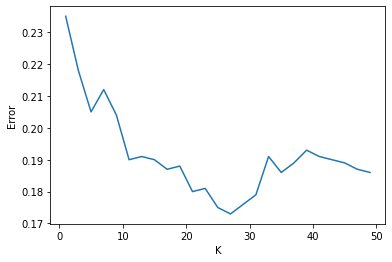

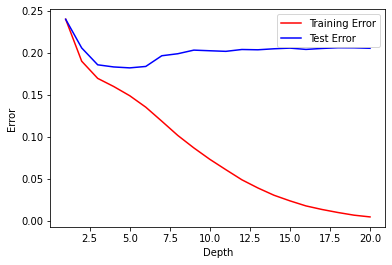

Investigating training set sizes...


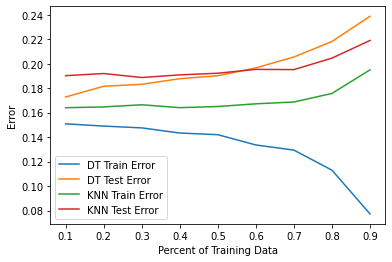

Done


In [ ]:
, cross_validate

######################################################################
# main
######################################################################

def main():



    # load adult_subsample dataset with correct file path
    ### ========== TODO : START ========== ###
    data_file =  "/content/drive/My Drive/adult_subsample.csv"
    ### ========== TODO : END ========== ###


    data = load_data(data_file, header=1, predict_col=-1)

    X = data.X; Xnames = data.Xnames
    y = data.y; yname = data.yname
    n,d = X.shape  # n = number of examples, d =  number of features




    #========================================
    # part a: plot histograms of each feature
    print('Plotting...')
    #plot_histograms (X, y, Xnames=Xnames, yname=yname)
    plt.show()



    ### ========== TODO : START ========== ###
    # part i: Preprocess X (e.g., normalize)
    # (try this after finishing the sections below)

    # X = ?
    ss = StandardScaler()
    X = ss.fit_transform(X)

    ### ========== TODO : END ========== ###




    #========================================
    # train Majority Vote classifier on data
    print('Classifying using Majority Vote...')
    clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
    clf.fit(X, y)                  # fit training data using the classifier
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)





    ### ========== TODO : START ========== ###
    # part b: evaluate training error of Random classifier
    print('Classifying using Random...')
    clf = RandomClassifier ()
    clf.fit(X,y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)

    # print('\t-- training error: %.3f' % train_error)
    ### ========== TODO : END ========== ###




    ### ========== TODO : START ========== ###
    # part c: evaluate training error of Decision Tree classifier
    print('Classifying using Decision Tree...')
    clf= DecisionTreeClassifier(criterion='entropy')
    clf.fit(X,y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)

    # print('\t-- training error: %.3f' % train_error)
    ### ========== TODO : END ========== ###




    ### ========== TODO : START ========== ###
    # part d: evaluate training error of k-Nearest Neighbors classifier
    # use k = 3, 5, 7 for n_neighbors
    print('Classifying using k-Nearest Neighbors...')
    print('k=3:')
    clf= KNeighborsClassifier(n_neighbors=3)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)
    print('k=5:')
    clf= KNeighborsClassifier(n_neighbors=5)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)
    print('k=7:')
    clf= KNeighborsClassifier(n_neighbors=7)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)


    # print the error for each k


    ### ========== TODO : END ========== ###




    ### ========== TODO : START ========== ###
    # part e: use cross-validation to compute average training and test error of classifiers
    print('Investigating various classifiers...')
    clf = MajorityVoteClassifier()
    xerror = error(clf,X,y)
    print('\t-- Majority training error: ' + str(xerror[0]))
    print('\t-- Majority test error: ' + str(xerror[1]))
    print('\t-- Majority F1 score: ' + str(xerror[2]))
    clf = RandomClassifier ()
    xerror = error(clf,X,y)
    print('\t-- Random training error: ' + str(xerror[0]))
    print('\t-- Random test error: ' + str(xerror[1]))
    print('\t-- Random F1 score: ' + str(xerror[2]))
    clf= DecisionTreeClassifier(criterion='entropy')
    xerror = error(clf,X,y)
    print('\t-- DT training error: ' + str(xerror[0]))
    print('\t-- DT test error: ' + str(xerror[1]))
    print('\t-- DT F1 score: ' + str(xerror[2]))
    clf= KNeighborsClassifier(n_neighbors=5)
    xerror = error(clf,X,y)
    print('\t-- KNN training error: ' + str(xerror[0]))
    print('\t-- KNN test error: ' + str(xerror[1]))
    print('\t-- KNN F1 score: ' + str(xerror[2]))


    ### ========== TODO : END ========== ###




    ### ========== TODO : START ========== ###
    # part f: use 10-fold cross-validation to find the best value of k for k-Nearest Neighbors classifier
    print('Finding the best k...')
    error_list=[]
    for k in list(range(1,50,2)):
      clf= KNeighborsClassifier(n_neighbors=k)
      xerror = 1-cross_val_score(clf,X,y,cv=10).mean()
      error_list.append(xerror)
    plt.plot(list(range(1,50,2)),error_list)
    plt.xlabel("K")
    plt.ylabel("Error")
    #plt.show()




    ### ========== TODO : END ========== ###




    ### ========== TODO : START ========== ###
    # part g: investigate decision tree classifier with various depths
    print('Investigating depths...')
    train_err_l=[]
    test_err_l=[]
    max_depth_l=[]

    for i in (list(range(1,21))):
      tree= DecisionTreeClassifier(criterion='entropy', max_depth=i)
      xerror= error(tree,X,y)
      train_err_l.append(xerror[0])
      test_err_l.append(xerror[1])
      max_depth_l.append(i)
    fig = plt.figure().add_subplot()
    fig.plot(max_depth_l, train_err_l, label="Training Error",color= "red")
    fig.plot(max_depth_l, test_err_l, label="Test Error",color= "blue")
    plt.xlabel("Depth")
    plt.ylabel("Error")
    plt.legend()
    plt.show()






    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part h: investigate decision tree and k-Nearest Neighbors classifier with various training set sizes
    # hint: use train_test_split (use random_state=0 for consistent results)

    print('Investigating training set sizes...')

    d_tree_test = []
    d_tree_train = []
    knn_test = []
    knn_train = []

    x_train_data = None
    x_test_data = None
    y_train_data = None
    y_test_data = None

    sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1, random_state = 0)
    for i, j in sss.split(X, y):
      x_train = X[i]
      x_test = X[j]
      y_train = y[i]
      y_test = y[j]

    # make a decision tree
    d_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
    d_tree.fit(x_train, y_train)

    # make a knn classifier
    knn = KNeighborsClassifier(n_neighbors = 15)
    knn.fit(x_train, y_train)

    percentages = [x/10.0 for x in range(1, 10)]

    for i in percentages:
      #get error
      d_train, d_test, f1 = error(d_tree, X, y, ntrials = 100, test_size = i)
      k_train, k_test, f1 = error(knn, X, y, ntrials = 100, test_size = i)

      #append values
      d_tree_train.append(d_train)
      d_tree_test.append(d_test)
      knn_test.append(k_test)
      knn_train.append(k_train)

    d_train_out,  = plt.plot(percentages, d_tree_train, label = "DT Train Error")
    d_test_out,   = plt.plot(percentages, d_tree_test,  label = "DT Test Error")
    k_test_out,   = plt.plot(percentages, knn_train,    label = "KNN Train Error")
    k_train_out,  = plt.plot(percentages, knn_test,     label = "KNN Test Error")



    plt.xlabel("Percent of Training Data")
    plt.ylabel("Error")
    hand = [d_train_out, d_test_out, k_train_out, k_test_out]
    plt.legend()
    plt.show()

    ### ========== TODO : END ========== ###



    print('Done')


if __name__ == "__main__":
    main()
